In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import html5lib
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [9]:
fconvdata = lambda data: pd.datetime.strptime(data,"%Y-%m-%d")
dados = pd.read_csv("arquivo_geral.csv", delimiter=";", parse_dates=['data'], date_parser=fconvdata)
dados.head(3)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0


In [29]:
df_brasil = dados[['data','casosNovos']].groupby(['data']).sum()
df_brasil = df_brasil[31:]
df_brasil.head(3)

,casosNovos
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0


In [23]:
from pmdarima.arima import auto_arima

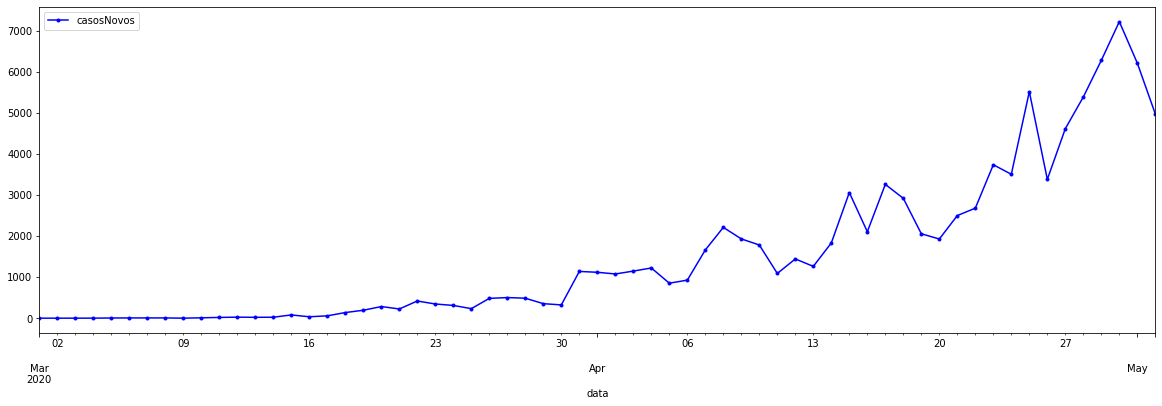

In [31]:
df_brasil.plot(marker='.', color='blue', legend=True)

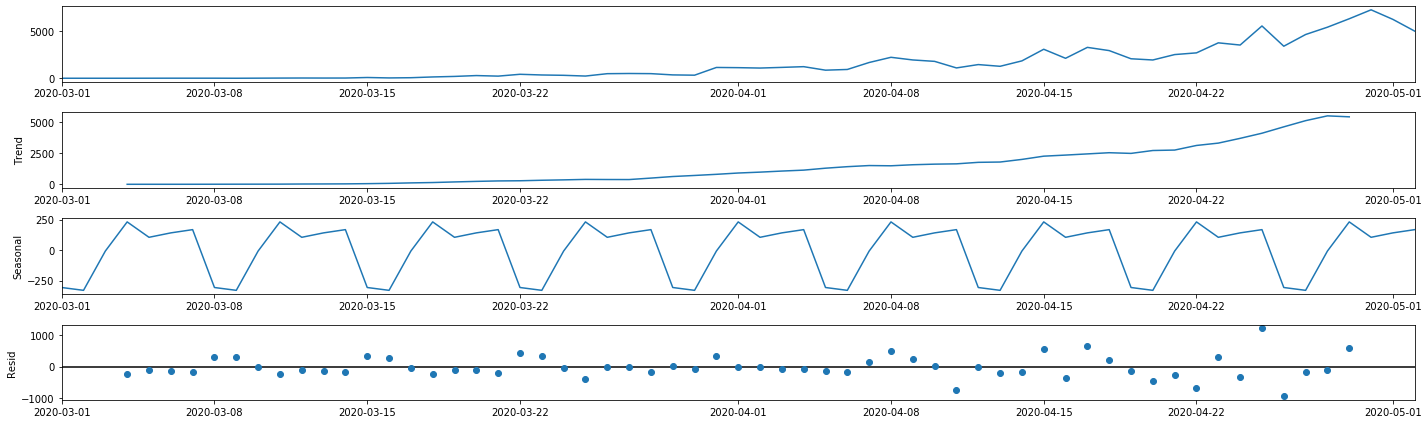

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_brasil, model="add")
result.plot()
plt.show()

In [59]:
from pmdarima.arima import auto_arima

In [64]:
bruteforce_modelo = auto_arima(df_brasil, start_p=0, start_d=0 ,start_q=0,max_p=6, max_d=0,max_q=6, m=7, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=894.659, BIC=898.673, Time=0.019 seconds
Fit ARIMA(0,1,0)x(0,1,1,7) [intercept=True]; AIC=880.625, BIC=886.647, Time=1.104 seconds
Fit ARIMA(0,1,0)x(0,1,2,7) [intercept=True]; AIC=882.527, BIC=890.556, Time=1.855 seconds
Fit ARIMA(0,1,0)x(1,1,0,7) [intercept=True]; AIC=888.732, BIC=894.754, Time=0.337 seconds
Fit ARIMA(0,1,0)x(1,1,1,7) [intercept=True]; AIC=882.588, BIC=890.617, Time=0.853 seconds
Fit ARIMA(0,1,0)x(1,1,2,7) [intercept=True]; AIC=883.743, BIC=893.780, Time=2.305 seconds
Fit ARIMA(0,1,0)x(2,1,0,7) [intercept=True]; AIC=878.681, BIC=886.711, Time=0.717 seconds
Fit ARIMA(0,1,0)x(2,1,1,7) [intercept=True]; AIC=879.527, BIC=889.564, Time=1.020 seconds
Fit ARIMA(0,1,0)x(2,1,2,7) [intercept=True]; AIC=881.466, BIC=893.510, Time=1.998 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=888.129, BIC=894.151, Time=0.166 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=870.532, BIC=878.562, Time=0.890 seconds
Fit ARIMA(

In [65]:
print(bruteforce_modelo.aic())

866.0724888465072


In [87]:
df_brasil.head(500)

,casosNovos
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,1
2020-03-05,4
...,...
2020-04-28,5385
2020-04-29,6276
2020-04-30,7218


In [118]:
df_brasil.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
      

In [166]:
dias_previsao = 30

In [184]:
import datetime 
dataatual = datetime.datetime.today()
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(dias_previsao)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

In [185]:
futuro_forecast = bruteforce_modelo.predict(n_periods=dias_previsao)
futuro_forecast = pd.DataFrame(futuro_forecast,index = lista_datas,columns=["casosNovos"])
futuro_forecast.index.name = 'data'
futuro_forecast.index = pd.to_datetime(futuro_forecast.index)
futuro_forecast.head(2)

,casosNovos
data,
2020-05-03,4650.428395
2020-05-04,4713.192483


In [186]:
import plotly.express as px
final = pd.concat([df_brasil,futuro_forecast])
final.head(2)

,casosNovos
data,
2020-03-01,0.0
2020-03-02,0.0


In [187]:
fig = px.line(final, x=final.index, y="casosNovos", width=1300, height=600)
fig.show()